In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [5]:
import nltk

# This is only needed once, maybe?
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('words')

from nltk.corpus import stopwords, words
import string
import itertools

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('Storybook-Bibles.csv',  # Input file needs to be in the local directory  
                 usecols=['isbn', 'title', 'first_author', 'illustrator', 'other_authors', 'other_illustrators',
                          'publisher', 'location', 'year', 'pages', 'idb_msrp']
                )
df.rename(columns={'idb_msrp': 'msrp'}, inplace=True)

# Set $0.00 MSRP to NaN
df.loc[df['msrp'] <= 0, 'msrp'] = None

# Set dates below 1900 and above 2020 as invalid, then convert to a pandas time
df[(df['year'] > 2020) | (df['year'] < 1900)] = None
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [6]:
stop_words = set(stopwords.words('english'))

In [13]:
title_words = {}
for title in df['title']:
    if title is None:
        continue
        
    tokens = nltk.word_tokenize(title)
    for t in tokens:
        if t in title_words:
            title_words[t] += 1
        else:
            title_words[t] = 1

In [15]:
# Remove anything that's a stop word
filtered_words = {}
for word in title_words:
    if word.lower() not in stop_words:
        filtered_words[word] = title_words[word]

In [21]:
# Remove any trailing punctuation
filtered_minus_punct = {}
for word in filtered_words:
    if word[-1] in string.punctuation:
        word = word[:1]
        
    # Don't count single characters... they might be punct, or just 'a'
    if len(word) <= 1:
        continue
        
    # Also don't count words that start with punctuation
    if word[0] in string.punctuation:
        continue
        
    if word in filtered_minus_punct:
        filtered_minus_punct[word] += 1
    else:
        filtered_minus_punct[word] = 1

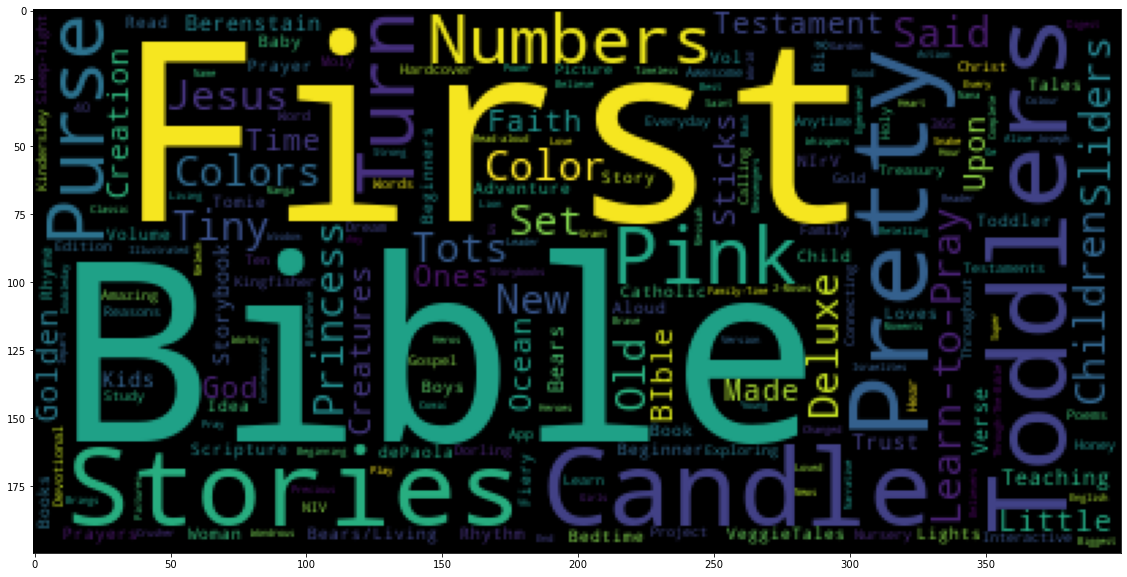

In [25]:
wordcloud = WordCloud().generate_from_frequencies(filtered_minus_punct)
fig, ax = plt.subplots(figsize=(20,10))        

ax.imshow(wordcloud)
        
plt.show()